# Data Processing

## 1. CSV file

In [1]:
import csv

In [2]:
filename = 'guangzhou-20171.csv'

with open(filename, encoding='gb2312', errors='ignore') as f:
    reader = csv.reader(f)
    # Read the first row
    header_row = next(reader)
    print(header_row)
    print()
    
    # Read the second row [data]
    first_row = next(reader)
    print(first_row)

['Date', 'Max TemperatureC', 'Min TemperatureC', 'Description', 'WindDir', 'WindForce']

['2017-1-1', '24', '13', '晴', '西南风', '1级']


In [3]:
%matplotlib inline
from datetime import datetime
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 10]
import pandas as pd

In [4]:
df = pd.read_csv(filename, encoding='gb2312')
df.head()

,Date,Max TemperatureC,Min TemperatureC,Description,WindDir,WindForce
0,2017-1-1,24,13,晴,西南风,1级
1,2017-1-2,25,15,多云,东北风,微风
2,2017-1-3,26,16,晴,北风,1级
3,2017-1-4,27,17,晴,东北风,1级
4,2017-1-5,25,17,多云,东北风,1级


### 1.1 Plot Weather Condition (matplotlib)

In [5]:
with open(filename, encoding='gb2312', errors='ignore') as f:
    reader = csv.reader(f)
    # read the first row
    header_row = next(reader)
    print(header_row)
    
    # Define the time range
    start_date = datetime(2017,6,30)
    end_date = datetime(2017,10,1)
    
    # Define three lists for data visualization
    dates,highs,lows = [],[],[]
    for row in reader:
        # Transfer first column to date
        d = datetime.strptime(row[0],'%Y-%m-%d')
        if start_date < d < end_date:
            dates.append(d)
            highs.append(int(row[1]))
            lows.append(int(row[2]))

['Date', 'Max TemperatureC', 'Min TemperatureC', 'Description', 'WindDir', 'WindForce']


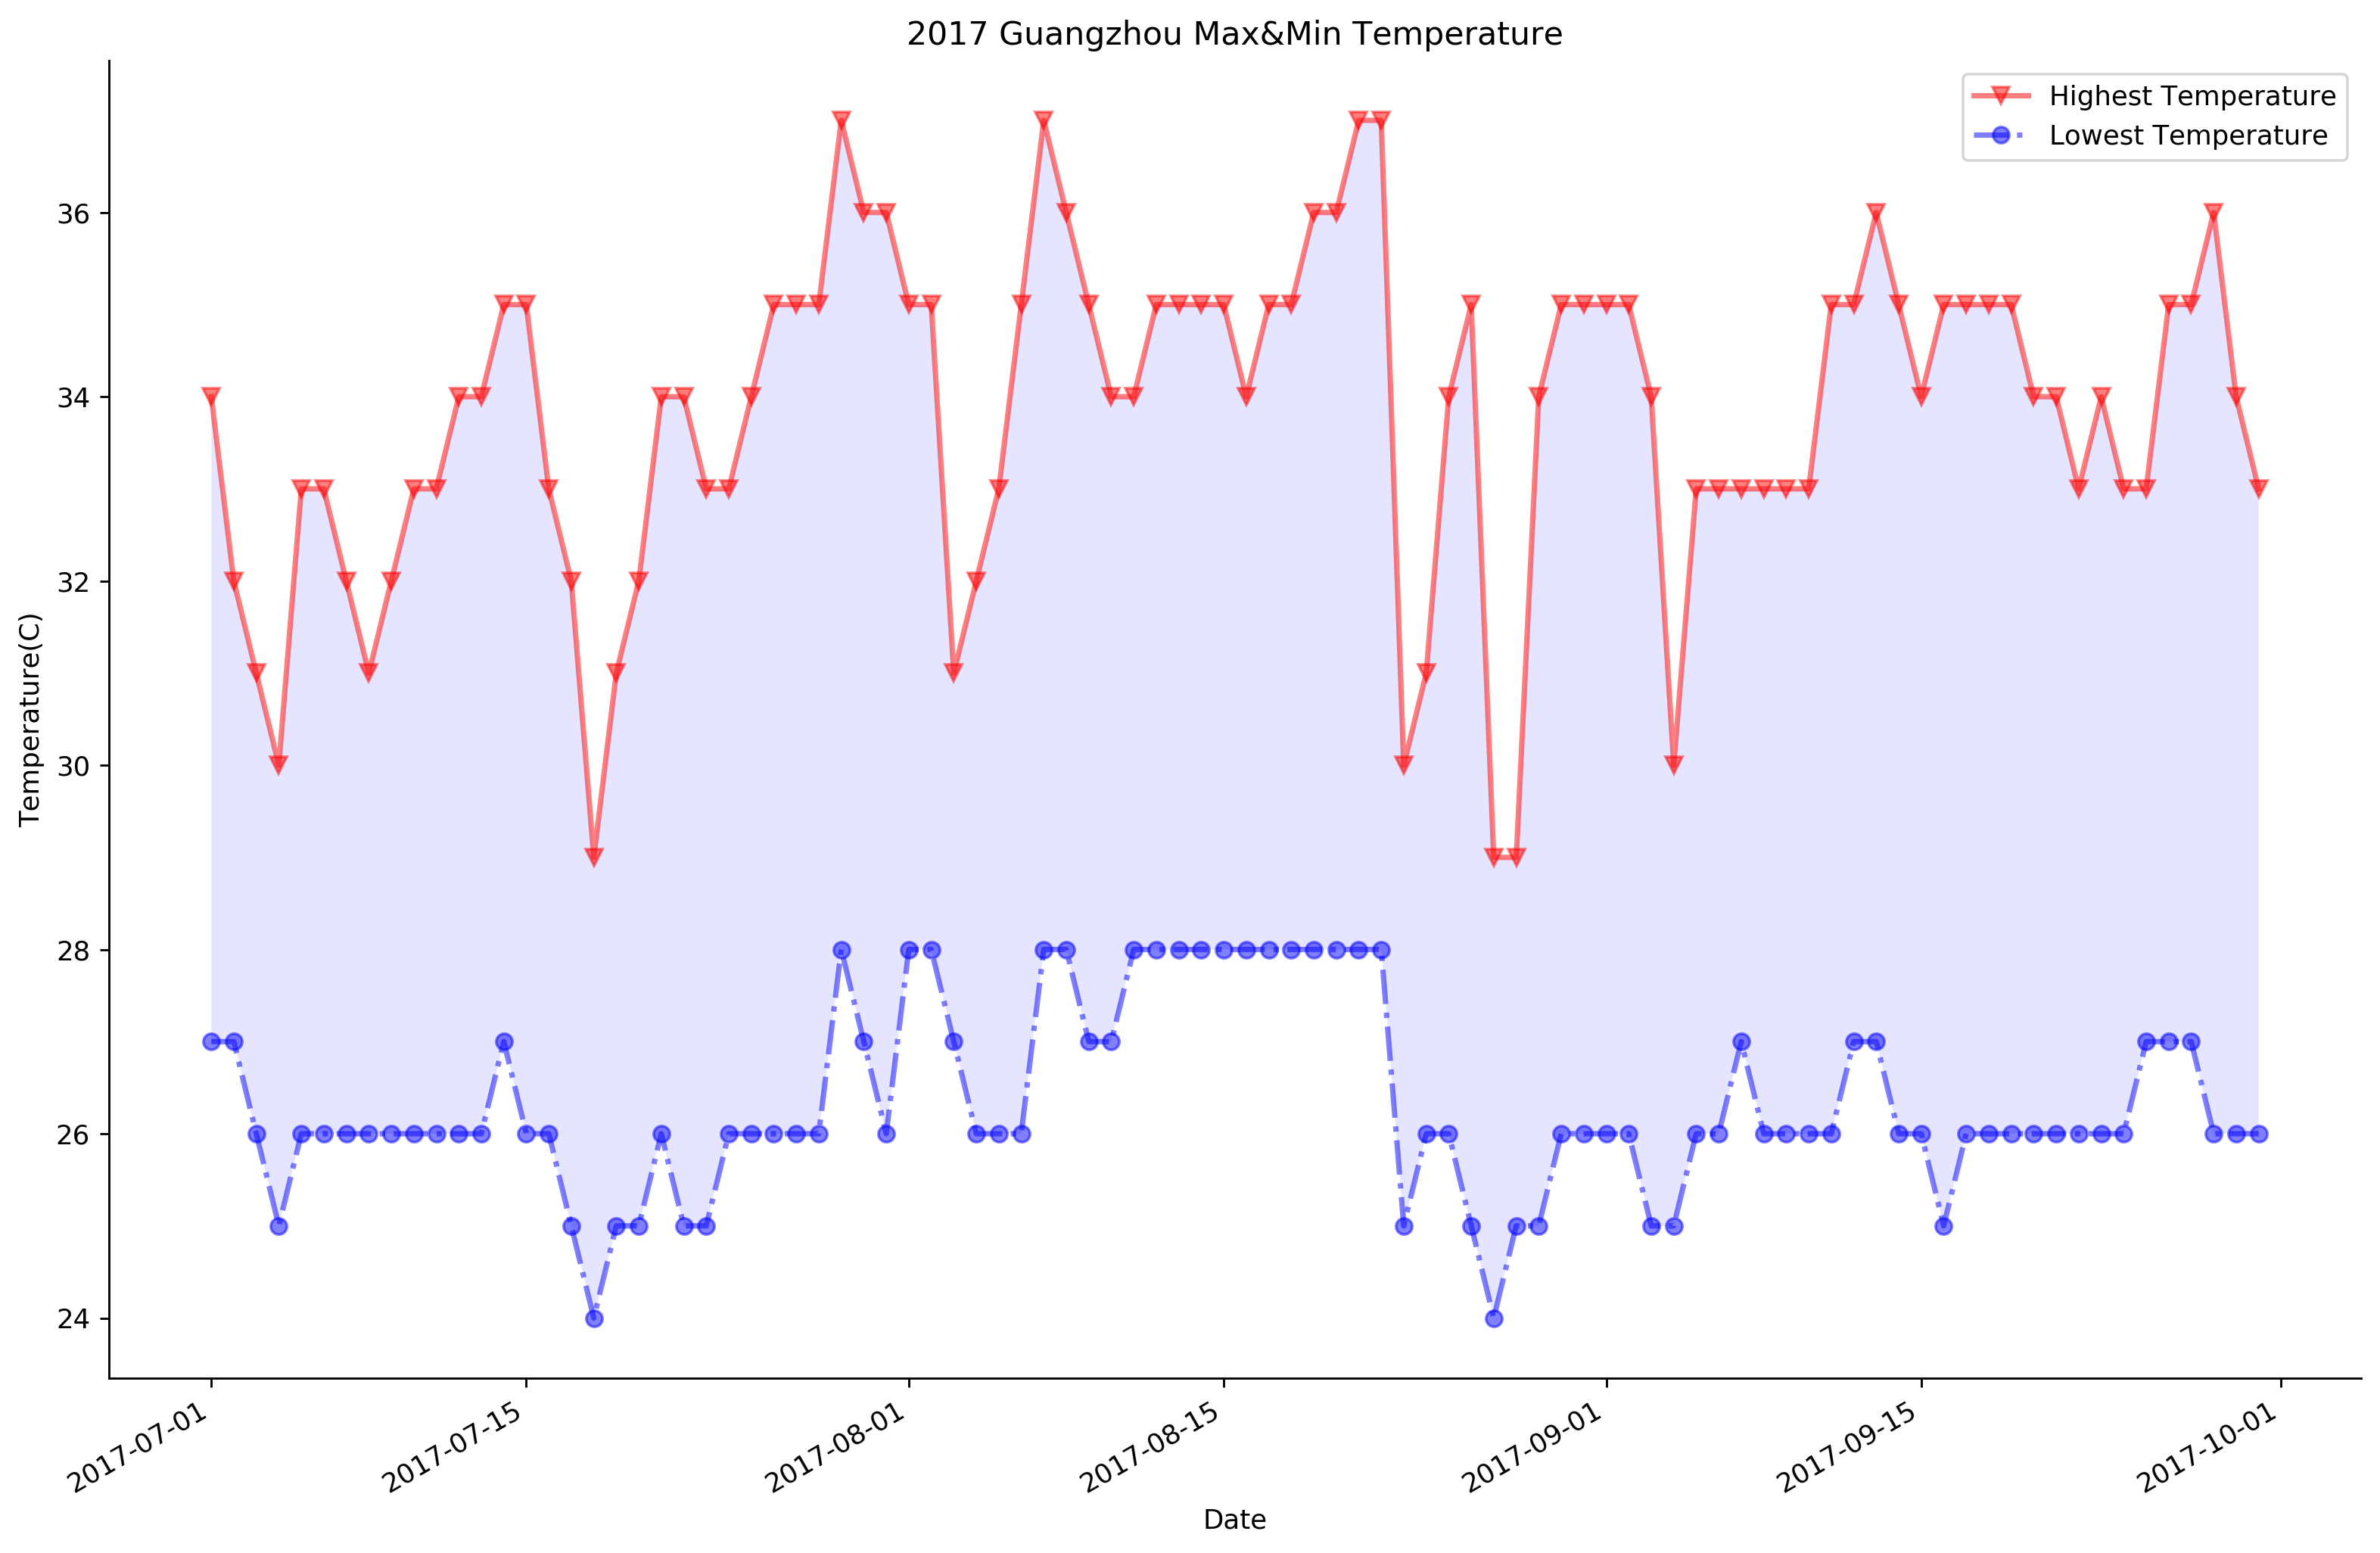

In [6]:
# Draw the graph
fig = plt.figure(dpi = 256, figsize = (15,10))

plt.plot(dates, highs, c = 'red',label = 'Highest Temperature', alpha = 0.5, linewidth = 2.0,
        linestyle = '-',marker = 'v')
plt.plot(dates, lows, c = 'blue',label = 'Lowest Temperature', alpha = 0.5, linewidth = 2.0,
        linestyle = '-.',marker = 'o')

# Add the color between two lines
plt.fill_between(dates,highs,lows,facecolor = 'blue',alpha = 0.1)

plt.title('2017 Guangzhou Max&Min Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature(C)')

# Set x label as date
fig.autofmt_xdate()

plt.legend()
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

### 1.2 Plot Weather Condition (pygal)

In [7]:
import pygal

In [8]:
with open(filename, encoding='gb2312', errors='ignore') as f:
    reader = csv.reader(f)
    header_row = next(reader)
    print(header_row)
    
    # Set lists for data visualization
    shades,sunnys,cloudys,rains = 0,0,0,0
    for row in reader:
        if '阴' in row[3]:
            shades += 1
        elif '晴' in row[3]:
            sunnys +=1
        elif '云' in row[3]:
            cloudys +=1
        elif '雨' in row[3]:
            rains +=1
        else:
            print(row[3])            

['Date', 'Max TemperatureC', 'Min TemperatureC', 'Description', 'WindDir', 'WindForce']


In [9]:
pie = pygal.Pie()
pie.add('Shades',shades)
pie.add('Sunnys',sunnys)
pie.add('Rainys',rains)
pie.add('Cloudys',cloudys)
pie.title ='Weathers in GuangZhou'
pie.legend_at_bottom = True
pie.render_to_file('guangzhou_weather.svg')

<img src ='guangzhou_weather.svg'>

## 2. Json 

In [10]:
import json
import numpy as np

In [11]:
filename = 'gdp_json.json'
df = pd.read_json(filename)
df1 = pd.DataFrame(df)
df1.head(10)

,Country Code,Country Name,Value,Year
0,ARB,Arab World,2.576068e+10,1968
1,ARB,Arab World,2.843420e+10,1969
2,ARB,Arab World,3.138550e+10,1970
3,ARB,Arab World,3.642691e+10,1971
4,ARB,Arab World,4.331606e+10,1972
5,ARB,Arab World,5.501839e+10,1973
6,ARB,Arab World,1.051458e+11,1974
7,ARB,Arab World,1.163370e+11,1975
8,ARB,Arab World,1.448462e+11,1976
9,ARB,Arab World,1.673083e+11,1977


In [12]:
with open(filename) as f:
    gpd_list = json.load(f)
    
for i,gpd_dict in enumerate(gpd_list):
    # only for chinese gdp
    if (gpd_dict['Country Code'] == 'CHN') and (gpd_dict['Year'] >= 2001):
        print(gpd_dict['Country Name'], gpd_dict['Value'], gpd_dict['Year'])

China 1339395718865.3 2001
China 1470550015081.55 2002
China 1660287965662.68 2003
China 1955347004963.27 2004
China 2285965892360.54 2005
China 2752131773355.16 2006
China 3552182311652.97 2007
China 4598206091384.0 2008
China 5109953609257.25 2009
China 6100620488867.55 2010
China 7572553836875.34 2011
China 8560547314679.28 2012
China 9607224481532.65 2013
China 10482372109961.9 2014
China 11064666282625.5 2015
China 11199145157649.2 2016


**Matplotlib plot**

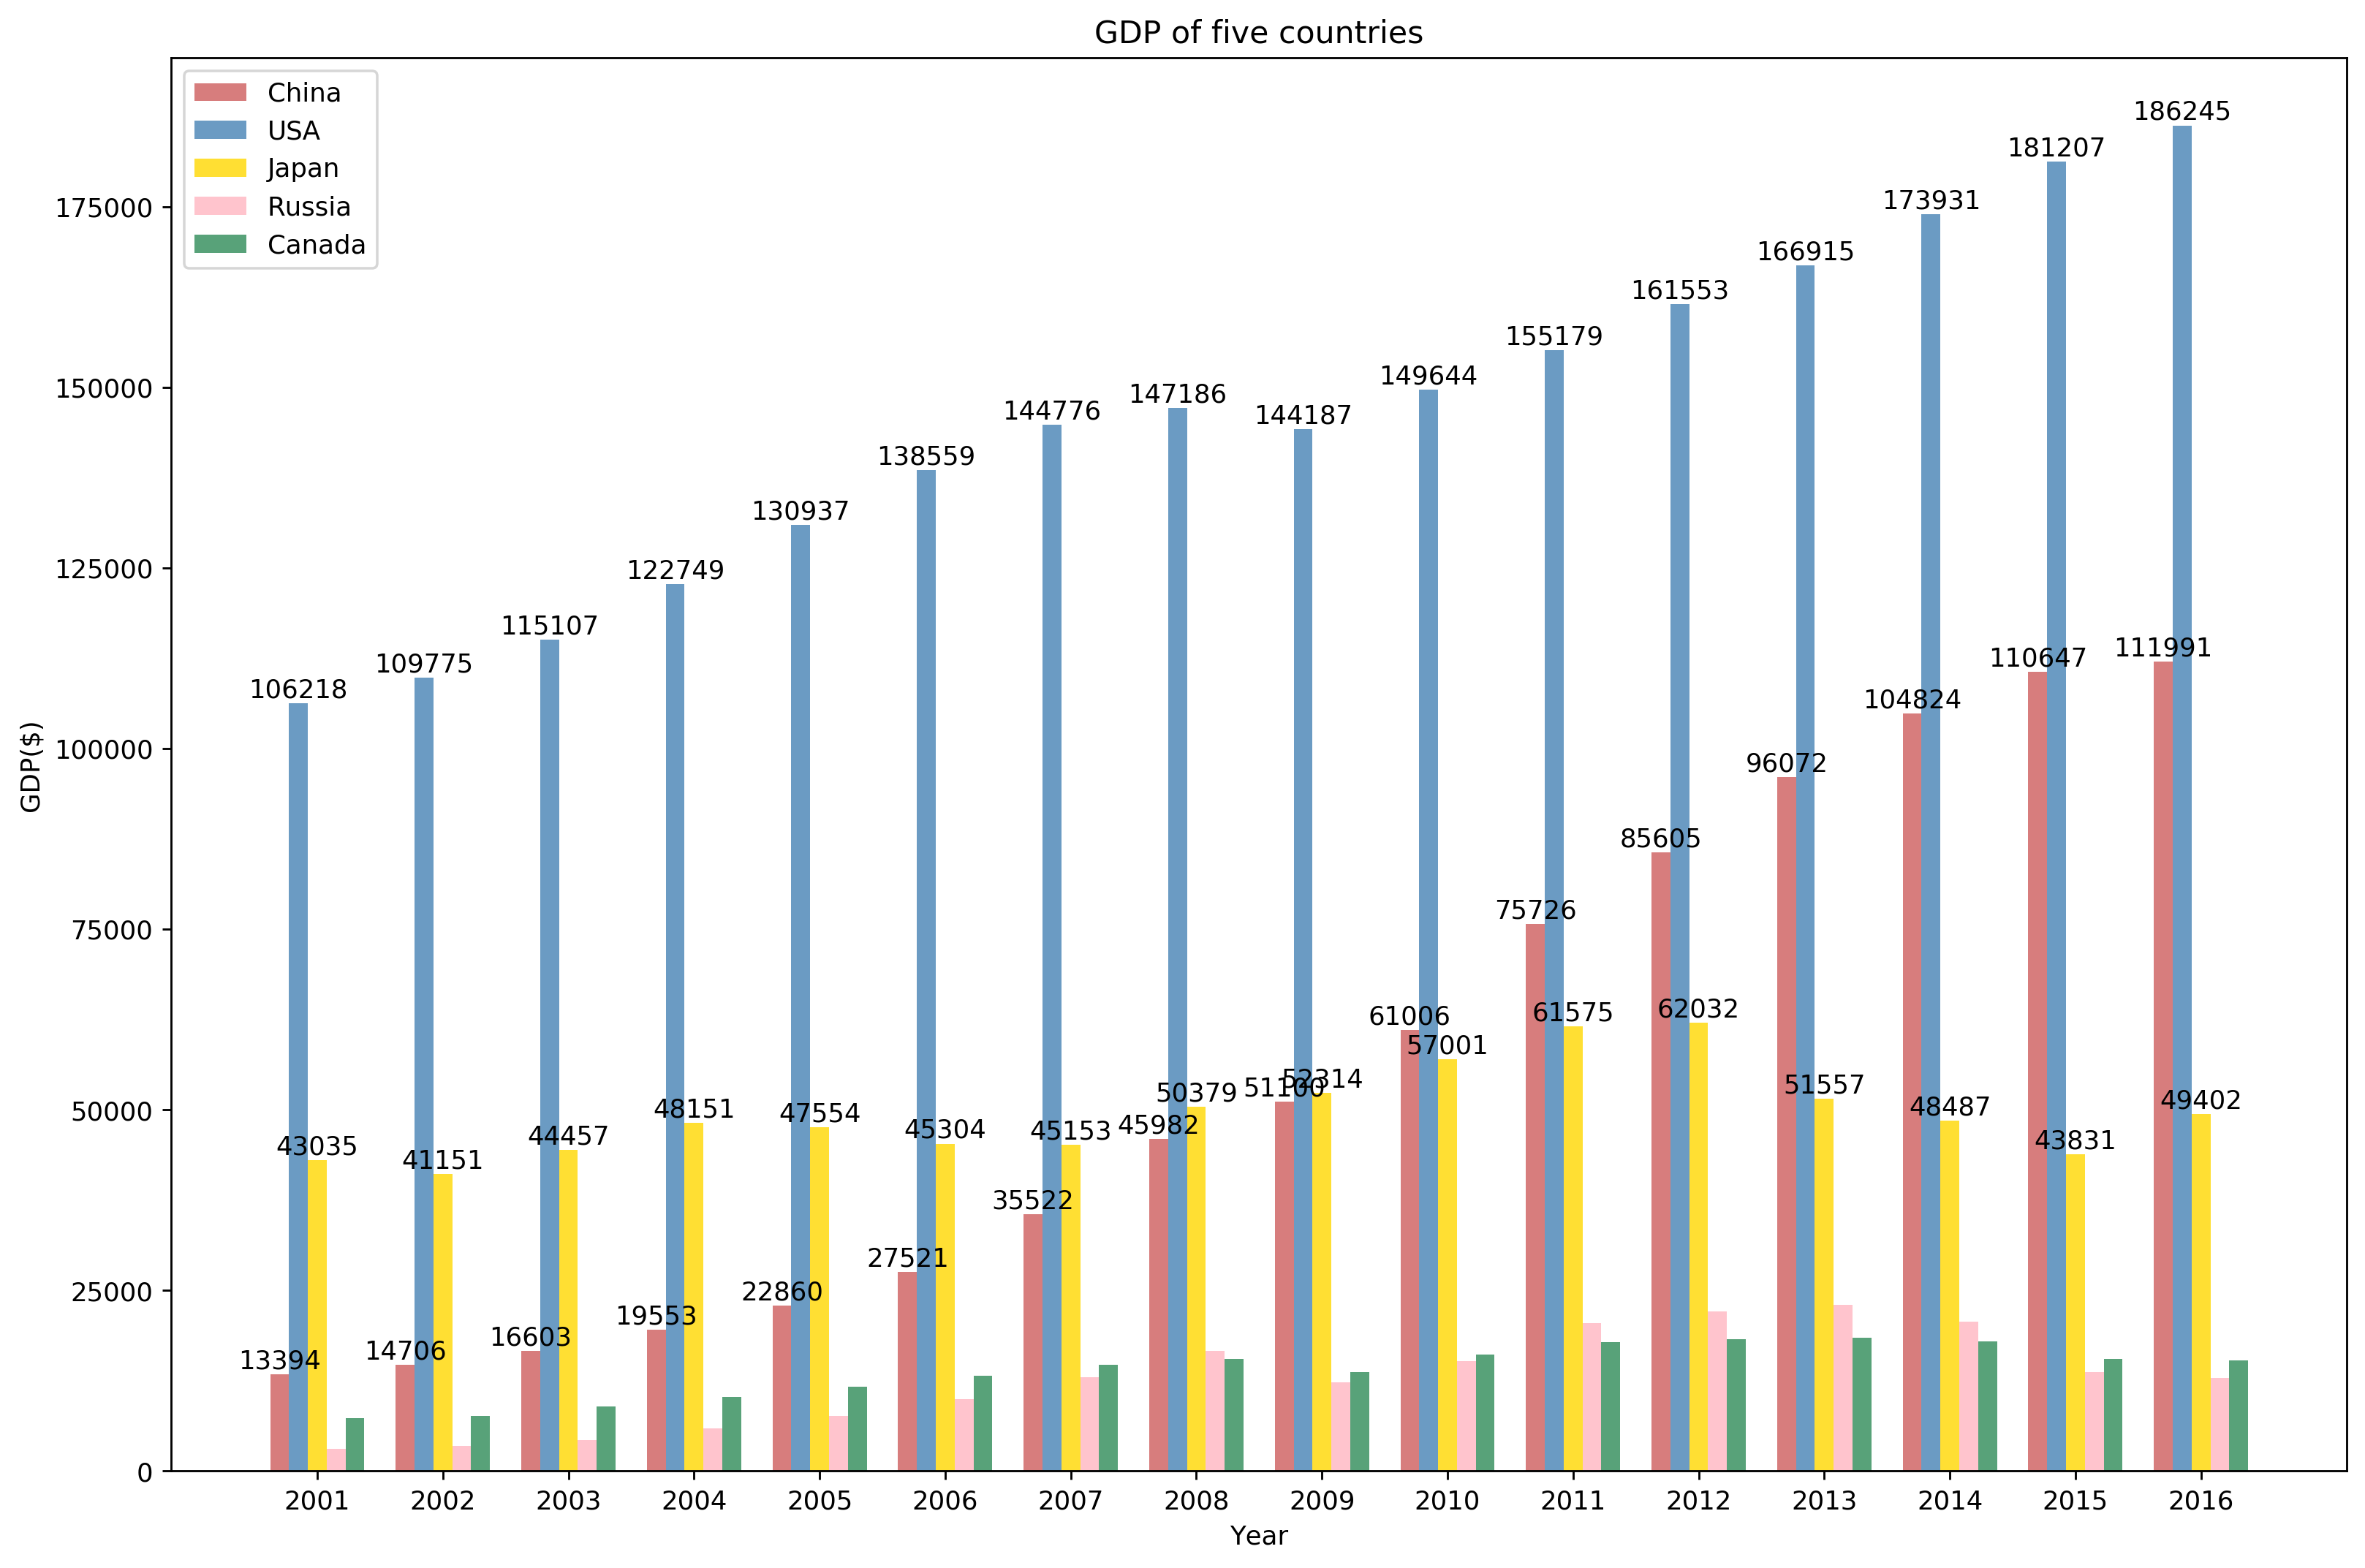

In [13]:
# Get China, US, Japan, Russia, Canada GDP
country_gdps = [{},{},{},{},{}]
country_codes = ['CHN','USA','JPN','RUS','CAN']

# Set time range
x_data = range(2001,2017)

for gpd_dict in gpd_list:
    for i,country_code in enumerate(country_codes):
        if gpd_dict['Country Code'] == country_code:
            year = gpd_dict['Year']
            if 2017 > year > 2000:
                country_gdps[i][year] = gpd_dict['Value']

# Transfer dict to list
country_gdp_list = [[],[],[],[],[]]
for i in range(len(country_gdp_list)):
    for year in x_data:
        # Change unit to 1e8
        country_gdp_list[i].append(country_gdps[i][year] / 1e8)
        
# Draw the graph
bar_width = 0.15
fig = plt.figure(dpi = 256,figsize = (15,10))
colors = ['indianred','steelblue','gold','lightpink','seagreen']
countries = ['China','USA','Japan','Russia','Canada']

# Plot 5 columns
for i in range(len(countries)):
    plt.bar(x = np.arange(len(x_data)) + bar_width * i, height = country_gdp_list[i],
           label = countries[i],color = colors[i], alpha = 0.8, width = bar_width)
    # Set text on first three countries
    if i < 3:
        for x,y in enumerate(country_gdp_list[i]):
            plt.text(x + bar_width * i,y+100, '%.0f' %y, ha = 'center',va = 'bottom')

plt.xticks(np.arange(len(x_data))+bar_width * 2,x_data)
plt.title('GDP of five countries')
plt.xlabel('Year')
plt.ylabel('GDP($)')
plt.legend(loc = 'best')
plt.show()

**Pygal Plot**

In [14]:
filename = 'gdp_json.json'
with open(filename) as f:
    gdp_list = json.load(f)
    
pop_filename = 'population-figures-by-country.json'
with open(pop_filename) as f:
    pop_list = json.load(f)

# Get GDP data for USA, Japan, Russia, Canada
country_mean_gdps = [{},{},{},{},{}]
country_codes = ['USA','JPN','RUS','CAN','CHN']

for gdp_dict in gdp_list:
    for i,country_code in enumerate(country_codes):
        if (gdp_dict['Country Code'] == country_code) and (2017 > gdp_dict['Year'] >2000):
            year = gdp_dict['Year']
            for pop_dict in pop_list:
                if pop_dict['Country_Code'] == country_code:
                    country_mean_gdps[i][year] = round(gdp_dict['Value'] / pop_dict['Population_in_%d' %year])
                    
df = pd.DataFrame(country_mean_gdps)
df

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,37274,38166,39677,41922,44308,46437,48062,48401,47002,48374,49791,51450,52787,54599,56469,57638
1,33846,32289,34808,37689,37218,35434,35275,39339,40855,44508,48168,48603,40454,38096,34474,38901
2,2100,2375,2975,4102,5323,6920,9101,11635,8563,10675,14351,15435,16007,14349,9479,8890
3,23692,24168,28172,31980,36190,40387,44545,46596,40773,47447,52082,52497,52414,50440,43316,42158
4,1053,1149,1289,1509,1753,2099,2695,3471,3838,4561,5634,6338,7078,7684,8069,8123


In [15]:
# Transfer to list
country_mean_gdp_list = [[],[],[],[],[]]
x_data = range(2001,2017)
for i in range(len(country_mean_gdp_list)):
    for year in x_data:
        country_mean_gdp_list[i].append(country_mean_gdps[i][year])

countries = ['USA','Japan','Russia','Canada','China']

# Draw the graph
bar = pygal.Bar()
# Add data
for i in range(len(countries)):
    bar.add(countries[i],country_mean_gdp_list[i])

bar.width = 1100
bar.x_labels = x_data
bar.title = 'Comparison of GDP'
bar.x_title = 'Year'
bar.y_title = 'Mean GDP($)'
bar.x_label_rotation = 45
bar.legend_at_bottom = True
bar.render_to_file('mean_gdp.svg')

<img src = 'mean_gdp.svg'>

## 3. Data Cleaning

In [16]:
from datetime import timedelta

In [17]:
filename = 'guangzhou-20171.csv'

with open(filename, encoding='gb2312', errors='ignore') as f:
    reader = csv.reader(f)
    head_row = next(reader)
    print(head_row)
    
    # preparing the data visualization
    shades,sunnys,cloudys,rains = 0,0,0,0
    prev_day = datetime(2016,12,31)
    for row in reader:
        try:
            cur_day = datetime.strptime(row[0],'%Y-%m-%d')
            description = row[3]
        except ValueError as e:
            print(cur_day, 'Value Error!')
        else:
            diff = cur_day - prev_day
            if diff != timedelta(days = 1):
                print('%d days data are missing before %s' %(diff.days -1, cur_day))
            prev_day = cur_day
            if '阴' in description:
                shades += 1
            elif '晴' in description:
                sunnys +=1
            elif '云' in description:
                cloudys +=1
            elif '雨' in description:
                rains +=1
            else:
                print(description) 

['Date', 'Max TemperatureC', 'Min TemperatureC', 'Description', 'WindDir', 'WindForce']
2 days data are missing before 2017-03-06 00:00:00


In [18]:
pie = pygal.Pie()
pie.add('Shades',shades)
pie.add('Sunnys',sunnys)
pie.add('Rainys',rains)
pie.add('Cloudys',cloudys)
pie.title ='Weathers in GuangZhou'
pie.legend_at_bottom = True
pie.render_to_file('guangzhou_weather.svg')

<img src = 'guangzhou_weather.svg'>

## 4. Read Online Data
* using `urllib.request` to get the data from web
* using `re` to do the data cleanning

In [19]:
import re
from urllib.request import *

In [20]:
# get data from http://lishi.tianqi.com/
def get_html(city,year,month):
    url = 'http://lishi.tianqi.com/' + city + '/' + str(year) + str(month) + '.html'
    # post a request
    request = Request(url)
    
    # Set a header
    request.add_header('User-Agent','Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
                       AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.87 Safari/537.36')
    response = urlopen(request)
    
    return response.read().decode('gbk','ignore')

In [21]:
dates, highs, lows = [],[],[]
city = 'chongqing'
year = '2019'
months = ['01','02','03','04','05','06','07','08','09','10','11','12']
prev_day = datetime(2018,12,31)

for month in months:
    html = get_html(city,year,month)
    text = ''.join(html.split())
    pattern = re.compile('<divclass = "tqtongji2">(.*?)</div><divstyle = "clear:both">')
    table = re.findall(pattern,text)
    pattern1 = re.compile('<ul>(.*?)</ul>')
    try:
        uls = re.findall(pattern1,table[0])
        
        for ul in uls:
            # Get the weather info
            pattern2 = re.compile('<li>(.*?)</li>')
            lis = re.findall(pattern2,ul)

            # Get the date
            d_str = re.findall('>(.*?)</a>',lis[0])[0]
        try:
            cur_day = datetime.strptime(d_str,'%Y-%m-%d')
            high = int(lis[1])
            low = int(lis[2])
        except ValueError:
            print(cur_day,' Data Error!')
        else:
            diff = cur_day - prev_day
            if diff != timedelta(days = 1):
                print('%d days data are missing before %s' %(diff.days -1, cur_day))
            prev_day = cur_day
            dates.append(cur_day)
            highs.append(high)
            lows.append(low)
    except:
        pass
    


In [22]:
dates

[]